In [39]:
# get MRIs of people w Alz, w/o Alz
import nilearn.datasets as fetch
import pandas as pd



In [40]:
patient_df = pd.read_csv("./patient_ids.csv")
alz_patient_ids = list(patient_df[patient_df['alz'] == 1]['ID'])
no_alz_patient_ids = list(patient_df[patient_df['alz'] == 0]['ID'])

In [41]:
data = fetch.fetch_oasis_vbm(data_dir="./data/")

/Users/finnroblin/anaconda3/envs/ml/lib/python3.7/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [42]:
data.gray_matter_maps

['./data/oasis1/OAS1_0001_MR1/mwrc1OAS1_0001_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0002_MR1/mwrc1OAS1_0002_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0003_MR1/mwrc1OAS1_0003_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0004_MR1/mwrc1OAS1_0004_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0005_MR1/mwrc1OAS1_0005_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0006_MR1/mwrc1OAS1_0006_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0007_MR1/mwrc1OAS1_0007_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0009_MR1/mwrc1OAS1_0009_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0010_MR1/mwrc1OAS1_0010_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0011_MR1/mwrc1OAS1_0011_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0012_MR1/mwrc1OAS1_0012_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/OAS1_0013_MR1/mwrc1OAS1_0013_MR1_mpr_anon_fslswapdim_bet.nii.gz',
 './data/oasis1/

In [43]:
print(list(no_alz_patient_ids))

['OAS1_0016_MR1', 'OAS1_0021_MR1', 'OAS1_0023_MR1', 'OAS1_0065_MR1', 'OAS1_0084_MR1', 'OAS1_0123_MR1', 'OAS1_0124_MR1', 'OAS1_0161_MR1', 'OAS1_0166_MR1', 'OAS1_0179_MR1', 'OAS1_0226_MR1', 'OAS1_0233_MR1', 'OAS1_0240_MR1', 'OAS1_0247_MR1', 'OAS1_0271_MR1', 'OAS1_0272_MR1', 'OAS1_0273_MR1', 'OAS1_0286_MR1', 'OAS1_0287_MR1', 'OAS1_0290_MR1', 'OAS1_0312_MR1', 'OAS1_0330_MR1', 'OAS1_0335_MR1', 'OAS1_0339_MR1', 'OAS1_0354_MR1', 'OAS1_0380_MR1', 'OAS1_0440_MR1', 'OAS1_0454_MR1']


In [44]:
data.gray_matter_maps[28]

'./data/oasis1/OAS1_0032_MR1/mwrc1OAS1_0032_MR1_mpr_anon_fslswapdim_bet.nii.gz'

In [45]:
from nilearn.plotting import plot_stat_map, show
bg_filename = data.gray_matter_maps[0]
z_slice = 0
display = plot_stat_map(data.gray_matter_maps[452], bg_img=bg_filename,
                        display_mode='z', cut_coords=[z_slice])
display.title("SVM weights")
show()

IndexError: list index out of range

In [46]:
test_str = './data/oasis1/OAS1_0032_MR1/mwrc1OAS1_0032_MR1_mpr_anon_fslswapdim_bet.nii.gz'


def get_patient_id(str):
    return int(str[19:23]) # hardcoded slice, change if necessary

print(get_patient_id(test_str))

32


In [64]:
# display a plot_stat_map for the given patient

def brain_plot(patient_id):
    bg_filename = data.gray_matter_maps[patient_id]
    z_slice = 0
    display = plot_stat_map(data.gray_matter_maps[patient_id], #bg_img=bg_filename,
                            display_mode='z', cut_coords=[z_slice])
    display.title("SVM weights")
    show()





ALZ_GRAY_MATTER = []
TD_GRAY_MATTER = []

ALZ_GRAY_MATTER_IDX = []
TD_GRAY_MATTER_IDX = []

def make_alz_gray_matter_maps(alz_patient_id_list):
    for i in range(0, len(data.gray_matter_maps)):
        # if i matches alz_patient_id_list and the patient_id in gray_matter_maps
        this_patient = get_patient_id(data.gray_matter_maps[i])
        #print(this_patient)
        for j in range(0, len(alz_patient_id_list)):
            #print(this_patient, " and id list:", alz_patient_id_list[j])
            if alz_patient_id_list[j] == this_patient:
                #print("Found!")
                try:
                    ALZ_GRAY_MATTER.append(data.gray_matter_maps[i])
                    ALZ_GRAY_MATTER_IDX.append(i)
                except IndexError:
                    print("ERROR: ", i,
                    "th index of gray_matter_maps, Patient #", alz_patient_id_list[j])

def make_td_gray_matter_maps(td_patient_id_list):
    for i in range(0, len(data.gray_matter_maps)):
        # if i matches td_patient_id_list and the patient_id in gray_matter_maps
        this_patient = get_patient_id(data.gray_matter_maps[i])
        for j in range(0, len(td_patient_id_list)):
            if td_patient_id_list[j] == this_patient:
                try:
                    TD_GRAY_MATTER.append(data.gray_matter_maps[i])
                    TD_GRAY_MATTER_IDX.append(i)
                except IndexError:
                    print("ERROR: ", i,
                    "th index of gray_matter_maps, Patient #", td_patient_id_list[j])


        

In [13]:
import re

In [15]:
def get_numbers_only_ids(ids):
    l = []
    # id in format: "OAS1_{PATIENT_ID}_MR1"
    # e.g., OAS1_0028_MR1
    # re '\d+' would give: ['1','0028','1']
    # so we get 1st element
    for id in ids:
#         l.append(int(filter(str.isdigit, id)))
        number = re.findall('\d+', id)
        #print(id, number)
        l.append(int(number[1]))
    return l

[28, 31, 35, 52, 53, 56, 67, 73, 122, 134, 137, 184, 185, 223, 268, 269, 278, 291, 316, 373, 382, 388, 399, 405, 424, 425, 430, 452]


In [63]:
alz_numerical_ids = get_numbers_only_ids(alz_patient_ids)
no_alz_numerical_ids = get_numbers_only_ids(no_alz_patient_ids)

# print('alz:\n', alz_numerical_ids, '\n')
# print('no alz:\n', no_alz_numerical_ids, '\n')

make_alz_gray_matter_maps(alz_numerical_ids)
make_td_gray_matter_maps(no_alz_numerical_ids)

print(alz_numerical_ids[:10])
print(TD_GRAY_MATTER)
print(ALZ_GRAY_MATTER)

[28, 31, 35, 52, 53, 56, 67, 73, 122, 134]
['./data/oasis1/OAS1_0016_MR1/mwrc1OAS1_0016_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0021_MR1/mwrc1OAS1_0021_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0023_MR1/mwrc1OAS1_0023_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0065_MR1/mwrc1OAS1_0065_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0084_MR1/mwrc1OAS1_0084_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0123_MR1/mwrc1OAS1_0123_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0124_MR1/mwrc1OAS1_0124_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0161_MR1/mwrc1OAS1_0161_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0166_MR1/mwrc1OAS1_0166_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0179_MR1/mwrc1OAS1_0179_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0226_MR1/mwrc1OAS1_0226_MR1_mpr_anon_fslswapdim_bet.nii.gz', './data/oasis1/OAS1_0233_MR1/mwrc1OAS1_0233_MR1_mpr_anon_fslswapd

In [ ]:
# Fetch atlas

atlas = fetch.fetch_atlas_harvard_oxford('cort-maxprob-thr0-1mm',data_dir="./atlases/")
atlas

In [70]:
atlas.filename

/Users/finnroblin/anaconda3/envs/ml/lib/python3.7/site-packages/nilearn/plotting/displays.py:103: UserWarning: No contour levels were found within the data range.
  **kwargs)


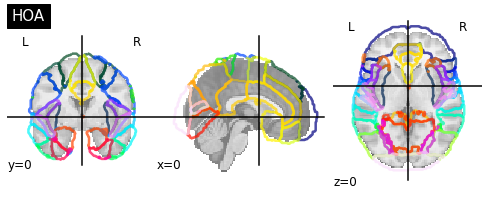

In [74]:
from nilearn import plotting
plotting.plot_roi(atlas.filename, view_type='contours',title="HOA")